In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from tools import utils, amputation
from alternative_imputers import muzellec_imputers
from tools.utils import colors
from tqdm import tqdm

plt.style.use(utils.plot_style)

from tools import imputation

In [14]:
p_miss = [0.10]#, 0.40, 0.7]
modes = ['mae']#, 'bayesianRidge'],
mechas = ['MCAR', 'MAR', 'MNAR']
imputer_names = ['mf', 'mean', 'ice', 'knn', 'mice', 'linearRR']

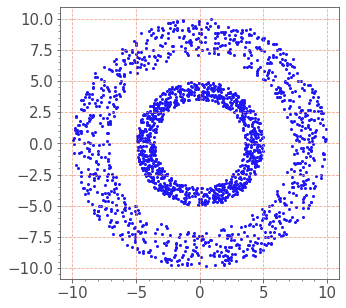

In [15]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()



In [16]:
X_full, X_miss, mask, imp = imputation.impute(dataset, p_miss[0], mechas[0], imputer_name = 'mf', mode='mae')

In [26]:
imputer_names = ['mice', 'knn', 'ice', 'mean']
p_miss = 0.4
mech = "MAR"
ncols = len(mechas)
datasets_miss_tot = []
imps_tot = []
for imputer_name in imputer_names:
    datasets_miss = []
    imps = []
    for mech in mechas:
        X_full, X_miss, mask, imp = imputation.impute(dataset, p_miss, mech, imputer_name)
        datasets_miss.append(X_miss)
        imps.append(imp)
    datasets_miss_tot.append(datasets_miss)
    imps_tot.append(imps)

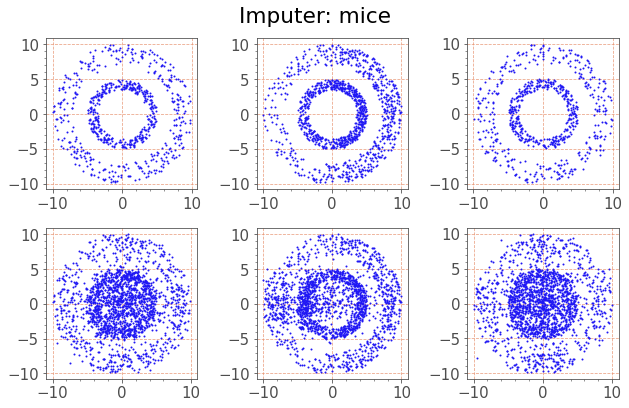

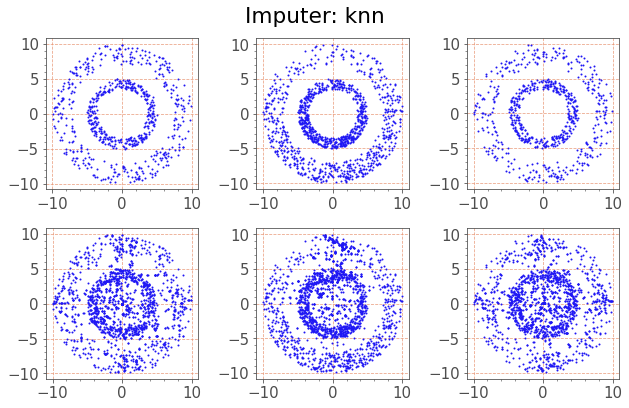

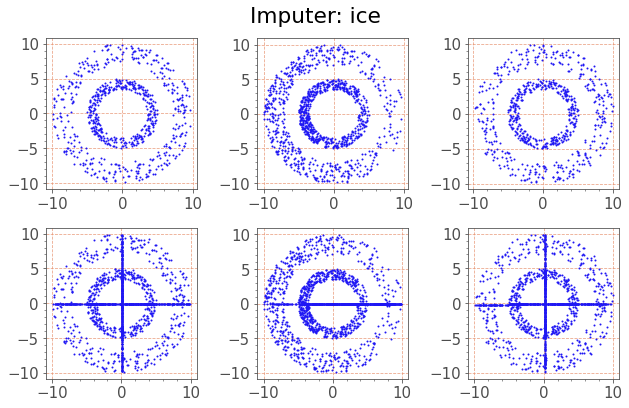

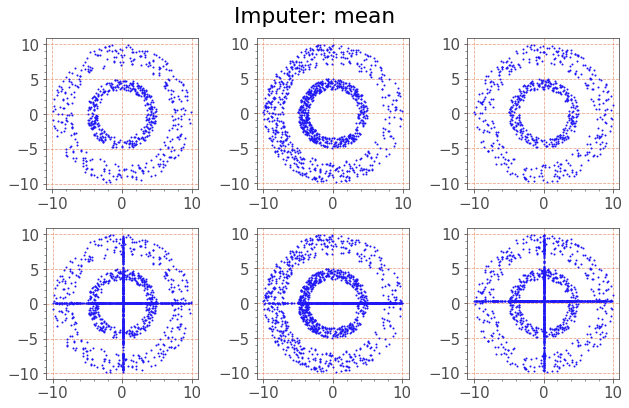

In [37]:
for idx, imputer_name in enumerate(imputer_names):
    fig, axs = plt.subplots(ncols=ncols, nrows = 2, figsize=(3*3,2 * 3))
    st = fig.suptitle(f"Imputer: {imputer_name}", fontsize="x-large")
    for i in range(ncols):
        axs[0][i].plot(datasets_miss_tot[idx][i][:,0],datasets_miss_tot[idx][i][:,1], 'o')
        axs[1][i].plot(imps_tot[idx][i][:,0],imps_tot[idx][i][:,1], 'o')
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)
    plt.savefig(f"figures/{mechas}, {np.array(p_miss)*100} %, impute: {imputer_name}.png", dpi=200)
    plt.tight_layout()